ООО "Фабрика оценки"

# Количественный анализ российского рынка жилой недвижимости в многоквартирных домах по состоянию на 2023-09-30 на основе данных Sberindex (сервис ПАО "Сбербанк") 

Приведённый в данном исследовании анализ полностью основан на данных, предоставляемых [Sberindex](https://sberindex.ru/en) и размещаемых им в [открытом доступе](https://sberindex.ru/en/dashboards?partition=7). Автор данного исследования, равно как и правообладатель модели машинного обучения Syväjärvi© (Sovconsult DDO), используемой в данной работе, а также провайдер облачной инфраструктуры данной модели (Meleksa Research AB), не имеют никакого отношения к Sberindex или ПАО "Сбербанк", равно как и Sberindex и ПАО "Сбербанк" не имеют отношения к данному исследованию и не несут какую-либо ответственность за его результаты и сделанные на его основе выводы.

Данное исследование распространяется на условиях лицензии [CC BY-SA 4.0 license](https://creativecommons.org/licenses/by-sa/4.0/).
Все данные, модели, выводы и резудьтаты предоставляются "как есть" и служат только для информационных целей.
Автор исследования, равно как и разработчик модели Syväjärvi© или провайдер её инфраструктуры не несут никакую ответственность за последствия использования данного исследования и не дают никакую гарантию за точность и правильность его содержания.
Любой частный либо корпоративный пользователь принимает на себя все риски использования данного исследования.

Данное исследование, равно как и все продукты, созданные с помощью модели Syväjärvi©, основано на следующих принципах:
1. согласие со справедливостью [Гипотезы Эффективного Рынка](https://en.wikipedia.org/wiki/Efficient-market_hypothesis);
1. [принцип KISS](https://en.wikipedia.org/wiki/KISS_principle);
1. соответствие требованиям параграфа 3 [МСФО 13 Оценка справедливой стоимости](https://www.ifrs.org/issued-standards/list-of-standards/ifrs-13-fair-value-measurement/#about).

## Сведения об использованных данных

|Данные|Правообладатель|Лицензия|URL|
| -- | -- | -- | -- |
|Количественные данные о рынке жилой недвижимости в многокевартирных домах|ПАО "Сбербанк"|не определена|[https://sberindex.ru/en/dashboards?partition=7](https://sberindex.ru/en/dashboards?partition=7)|
|Данные о координатах регионов в формате GeoJSON|Индивидуальный предприниматель Савостьянов Дмитрий Евгеньевич|не определена|[https://mydata.biz/ru/catalog/databases/borders_ru](https://mydata.biz/ru/catalog/databases/borders_ru)|

## Сведения о материалах, являющихся результатом данного исследования 

In [ ]:
Основные результаты приводятся в тексте данного исследовани

## Геоанализ

In [1]:
# Fetch the Data

import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect("sberindex.db")

# Fetching data from each table for September 2023
primary_deals = pd.read_sql("SELECT * FROM primary_deals WHERE date LIKE '2023-09%'", conn)
secondary_deals = pd.read_sql("SELECT * FROM secondary_deals WHERE date LIKE '2023-09%'", conn)
primary_offers = pd.read_sql("SELECT * FROM primary_offers WHERE date LIKE '2023-09%'", conn)
secondary_offers = pd.read_sql("SELECT * FROM secondary_offers WHERE date LIKE '2023-09%'", conn)
primary_volume = pd.read_sql("SELECT * FROM primary_volume WHERE date LIKE '2023-09%'", conn)
secondary_volume = pd.read_sql("SELECT * FROM secondary_volume WHERE date LIKE '2023-09%'", conn)
secondary_exposure = pd.read_sql("SELECT * FROM secondary_exposure WHERE date LIKE '2023-09%'", conn)


In [2]:
# Read Geospatial Data

import geopandas as gpd
import folium
from folium.plugins import HeatMap

# Load the GeoJSON data
gdf = gpd.read_file('/home/kaarlahti/PycharmProjects/sberindex/geodata/rf_regions.geojson')

# Print the columns
print(gdf.columns)


Index(['flag', 'ref', 'name', 'note', 'is_in', 'koatuu', 'place', 'ref:en',
       'ref:ru', 'ref:uk',
       ...
       'official_name:fr', 'official_name:it', 'official_name:ru',
       'official_name:lez', 'official_name:tt', 'official_name:bxr',
       'official_name:udm', 'population:source', 'is_in:country_code',
       'geometry'],
      dtype='object', length=194)


In [3]:
# Inspect Region Names in Both Datasets

# SQLite
unique_regions_sqlite = primary_deals['region'].unique()
print(len(unique_regions_sqlite))
print(unique_regions_sqlite)


75
['Алтайский край' 'Амурская область' 'Архангельская область'
 'Астраханская область' 'Белгородская область' 'Брянская область'
 'Владимирская область' 'Волгоградская область' 'Вологодская область'
 'Воронежская область' 'Забайкальский край' 'Ивановская область'
 'Иркутская область' 'Кабардино-Балкарская Республика'
 'Калининградская область' 'Калужская область' 'Кемеровская область'
 'Кировская область' 'Костромская область' 'Краснодарский край'
 'Красноярский край' 'Курганская область' 'Курская область'
 'Ленинградская область' 'Липецкая область' 'Москва' 'Московская область'
 'Нижегородская область' 'Новгородская область' 'Новосибирская область'
 'Омская область' 'Оренбургская область' 'Орловская область'
 'Пензенская область' 'Пермский край' 'Приморский край'
 'Псковская область' 'Республика Адыгея' 'Республика Алтай'
 'Республика Башкортостан' 'Республика Бурятия' 'Республика Дагестан'
 'Республика Калмыкия' 'Республика Карелия' 'Республика Коми'
 'Республика Марий Эл' 'Республи

In [4]:
# GeoJSON
unique_regions_geojson = gdf['name'].unique()
print(unique_regions_geojson)

['Сумска' 'Камчатский край' 'Мурманская область' 'Пермский край'
 'Свердловская область' 'Вологодская область' 'Владимирская область'
 'Калининградская область' 'Челябинская область' 'Новгородская область'
 'Ингушетия' 'Тверская область' 'Сахалинская область' 'Калужская область'
 'Самарская область' 'Ивановская область' 'Орловская область'
 'Смоленская область' 'Тульская область' 'Чукотский автономный округ'
 'Томская область' 'Приморский край' 'Республика Карелия'
 'Архангельская область' 'Мордовия' 'Ульяновская область'
 'Волгоградская область' 'Астраханская область' 'Курская область'
 'Воронежская область' 'Ярославская область' 'Новосибирская область'
 'Ненецкий автономный округ' 'Республика Коми' 'Омская область'
 'Башкортостан' 'Оренбургская область' 'Еврейская автономная область'
 'Удмуртия' 'Татарстан' 'Калмыкия' 'Санкт-Петербург'
 'Нижегородская область' 'Ленинградская область' 'Кировская область'
 'Костромская область' 'Брянская область' 'Псковская область'
 'Саратовская облас

In [5]:
mismatched_regions_sqlite = [region for region in unique_regions_sqlite if region not in unique_regions_geojson]
mismatched_regions_geojson = [region for region in unique_regions_geojson if region not in unique_regions_sqlite]

print("Regions in SQLite but not in GeoJSON:", mismatched_regions_sqlite)
print("Regions in GeoJSON but not in SQLite:", mismatched_regions_geojson)


Regions in SQLite but not in GeoJSON: ['Кабардино-Балкарская Республика', 'Республика Адыгея', 'Республика Башкортостан', 'Республика Бурятия', 'Республика Дагестан', 'Республика Калмыкия', 'Республика Марий Эл', 'Республика Мордовия', 'Республика Северная Осетия — Алания', 'Республика Татарстан', 'Республика Тыва', 'Удмуртская Республика', 'Ханты-Мансийский автономный округ — Югра', 'Чувашская Республика', 'Россия']
Regions in GeoJSON but not in SQLite: ['Сумска', 'Камчатский край', 'Мурманская область', 'Ингушетия', 'Чукотский автономный округ', 'Мордовия', 'Ненецкий автономный округ', 'Башкортостан', 'Еврейская автономная область', 'Удмуртия', 'Татарстан', 'Калмыкия', 'Северная Осетия - Алания', 'Дагестан', 'Чеченская республика', 'Магаданская область', 'Ханты-Мансийский автономный округ - Югра', 'Адыгея', 'Марий Эл', 'Чувашия', 'Тыва', 'Бурятия', 'Кабардино-Балкария', 'Карачаево-Черкесия']


In [7]:
name_mapping = {
    "Кабардино-Балкарская Республика": "Кабардино-Балкария",
    "Республика Адыгея": "Адыгея",
    "Республика Башкортостан": "Башкортостан",
    "Республика Бурятия": "Бурятия",
    "Республика Дагестан": "Дагестан",
    "Республика Калмыкия": "Калмыкия",
    "Республика Марий Эл": "Марий Эл",
    "Республика Мордовия": "Мордовия",
    "Республика Северная Осетия — Алания": "Северная Осетия - Алания",
    "Республика Татарстан": "Татарстан",
    "Республика Тыва": "Тыва",
    "Удмуртская Республика": "Удмуртия",
    "Ханты-Мансийский автономный округ — Югра": "Ханты-Мансийский автономный округ - Югра",
    "Чувашская Республика": "Чувашия"
}


In [8]:
# Update region names in the dataframes based on the mapping dictionary
primary_deals['region'] = primary_deals['region'].replace(name_mapping)
secondary_deals['region'] = secondary_deals['region'].replace(name_mapping)
primary_offers['region'] = primary_offers['region'].replace(name_mapping)
secondary_offers['region'] = secondary_offers['region'].replace(name_mapping)
primary_volume['region'] = primary_volume['region'].replace(name_mapping)
secondary_volume['region'] = secondary_volume['region'].replace(name_mapping)
secondary_exposure['region'] = secondary_exposure['region'].replace(name_mapping)


In [9]:
# SQLite
unique_regions_sqlite = primary_deals['region'].unique()
print(len(unique_regions_sqlite))
print(unique_regions_sqlite)

75
['Алтайский край' 'Амурская область' 'Архангельская область'
 'Астраханская область' 'Белгородская область' 'Брянская область'
 'Владимирская область' 'Волгоградская область' 'Вологодская область'
 'Воронежская область' 'Забайкальский край' 'Ивановская область'
 'Иркутская область' 'Кабардино-Балкария' 'Калининградская область'
 'Калужская область' 'Кемеровская область' 'Кировская область'
 'Костромская область' 'Краснодарский край' 'Красноярский край'
 'Курганская область' 'Курская область' 'Ленинградская область'
 'Липецкая область' 'Москва' 'Московская область' 'Нижегородская область'
 'Новгородская область' 'Новосибирская область' 'Омская область'
 'Оренбургская область' 'Орловская область' 'Пензенская область'
 'Пермский край' 'Приморский край' 'Псковская область' 'Адыгея'
 'Республика Алтай' 'Башкортостан' 'Бурятия' 'Дагестан' 'Калмыкия'
 'Республика Карелия' 'Республика Коми' 'Марий Эл' 'Мордовия'
 'Республика Саха (Якутия)' 'Северная Осетия - Алания' 'Татарстан' 'Тыва'
 'Рес

In [10]:
# GeoJSON
unique_regions_geojson = gdf['name'].unique()
print(unique_regions_geojson)

['Сумска' 'Камчатский край' 'Мурманская область' 'Пермский край'
 'Свердловская область' 'Вологодская область' 'Владимирская область'
 'Калининградская область' 'Челябинская область' 'Новгородская область'
 'Ингушетия' 'Тверская область' 'Сахалинская область' 'Калужская область'
 'Самарская область' 'Ивановская область' 'Орловская область'
 'Смоленская область' 'Тульская область' 'Чукотский автономный округ'
 'Томская область' 'Приморский край' 'Республика Карелия'
 'Архангельская область' 'Мордовия' 'Ульяновская область'
 'Волгоградская область' 'Астраханская область' 'Курская область'
 'Воронежская область' 'Ярославская область' 'Новосибирская область'
 'Ненецкий автономный округ' 'Республика Коми' 'Омская область'
 'Башкортостан' 'Оренбургская область' 'Еврейская автономная область'
 'Удмуртия' 'Татарстан' 'Калмыкия' 'Санкт-Петербург'
 'Нижегородская область' 'Ленинградская область' 'Кировская область'
 'Костромская область' 'Брянская область' 'Псковская область'
 'Саратовская облас

In [11]:
mismatched_regions_sqlite = [region for region in unique_regions_sqlite if region not in unique_regions_geojson]
mismatched_regions_geojson = [region for region in unique_regions_geojson if region not in unique_regions_sqlite]

print("Regions in SQLite but not in GeoJSON:", mismatched_regions_sqlite)
print("Regions in GeoJSON but not in SQLite:", mismatched_regions_geojson)

Regions in SQLite but not in GeoJSON: ['Россия']
Regions in GeoJSON but not in SQLite: ['Сумска', 'Камчатский край', 'Мурманская область', 'Ингушетия', 'Чукотский автономный округ', 'Ненецкий автономный округ', 'Еврейская автономная область', 'Чеченская республика', 'Магаданская область', 'Карачаево-Черкесия']


In [12]:
# List of redundant regions to be removed
redundant_regions = ['Сумска', 'Камчатский край', 'Мурманская область', 'Ингушетия', 
                     'Чукотский автономный округ', 'Ненецкий автономный округ', 
                     'Еврейская автономная область', 'Чеченская республика', 
                     'Магаданская область', 'Карачаево-Черкесия']

# Filter out these regions from the gdf
gdf = gdf[~gdf['name'].isin(redundant_regions)]


In [35]:
# Calculate discount rates

def calculate_discount(deals_df, offers_df):
    # Merge the data frames on the region column
    merged_df = pd.merge(deals_df, offers_df, on='region', how='outer', suffixes=('_deal', '_offer'))
    
    # Calculate discount rate
    merged_df['discount_rate'] = 1 - (merged_df['value_deal'] / merged_df['value_offer'])
    
    # Keep only the necessary columns
    result_df = merged_df[['region', 'discount_rate']]
    
    return result_df

# Calculate discount rates for primary and secondary markets
primary_discounts = calculate_discount(primary_deals, primary_offers)
secondary_discounts = calculate_discount(secondary_deals, secondary_offers)

primary_discounts.loc[primary_discounts['discount_rate'] < 0, 'discount_rate'] = 0
secondary_discounts.loc[secondary_discounts['discount_rate'] < 0, 'discount_rate'] = 0



In [36]:
# Set the display options to show all rows
pd.set_option('display.max_rows', None)

# Now print the dataframe
print(primary_discounts)

                                      region  discount_rate
0                             Алтайский край       0.103235
1                           Амурская область       0.097377
2                      Архангельская область       0.204494
3                       Астраханская область       0.000000
4                       Белгородская область       0.017666
5                           Брянская область       0.048781
6                       Владимирская область       0.118940
7                      Волгоградская область       0.052725
8                        Вологодская область       0.108729
9                        Воронежская область       0.067050
10                        Забайкальский край       0.012043
11                        Ивановская область       0.000000
12                         Иркутская область       0.046430
13                        Кабардино-Балкария            NaN
14                   Калининградская область       0.142138
15                         Калужская обл

In [46]:
import matplotlib.pyplot as plt

def create_and_display_heatmaps(data, column_name, display_name, filename):
    # Merge data with gdf
    merged_data = gdf.merge(data, left_on="name", right_on="region")
    
    # Create a new figure and axis
    fig, ax = plt.subplots(1, 1, figsize=(55, 13))
    
    # Plot the data
    merged_data.plot(column=column_name, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, aspect='equal')
    
    # Set the title
    ax.set_title(display_name)
    
    # Save the plot to a file
    plt.savefig(filename, dpi=300)
    
    ax.set_aspect('equal')
    
    # Show the plot
    plt.show()

In [47]:
# Add to datasets
datasets_plt = [
    (primary_deals, 'value', 'Primary Deals', 'primary_deals.png'),
    (secondary_deals, 'value', 'Secondary Deals', 'secondary_deals.png'),
    (primary_offers, 'value', 'Primary Offers', 'primary_offers.png'),
    (secondary_offers, 'value', 'Secondary Offers', 'secondary_offers.png'),
    (primary_volume, 'value', 'Primary Volume', 'primary_volume.png'),
    (secondary_volume, 'value', 'Secondary Volume', 'secondary_volume.png'),
    (secondary_exposure, 'value', 'Secondary Exposure', 'secondary_exposure.png'),
    (primary_discounts, 'discount_rate', 'Primary Discount Rate', 'primary_discount.png'),
    (secondary_discounts, 'discount_rate', 'Secondary Discount Rate', 'secondary_discount.png')]

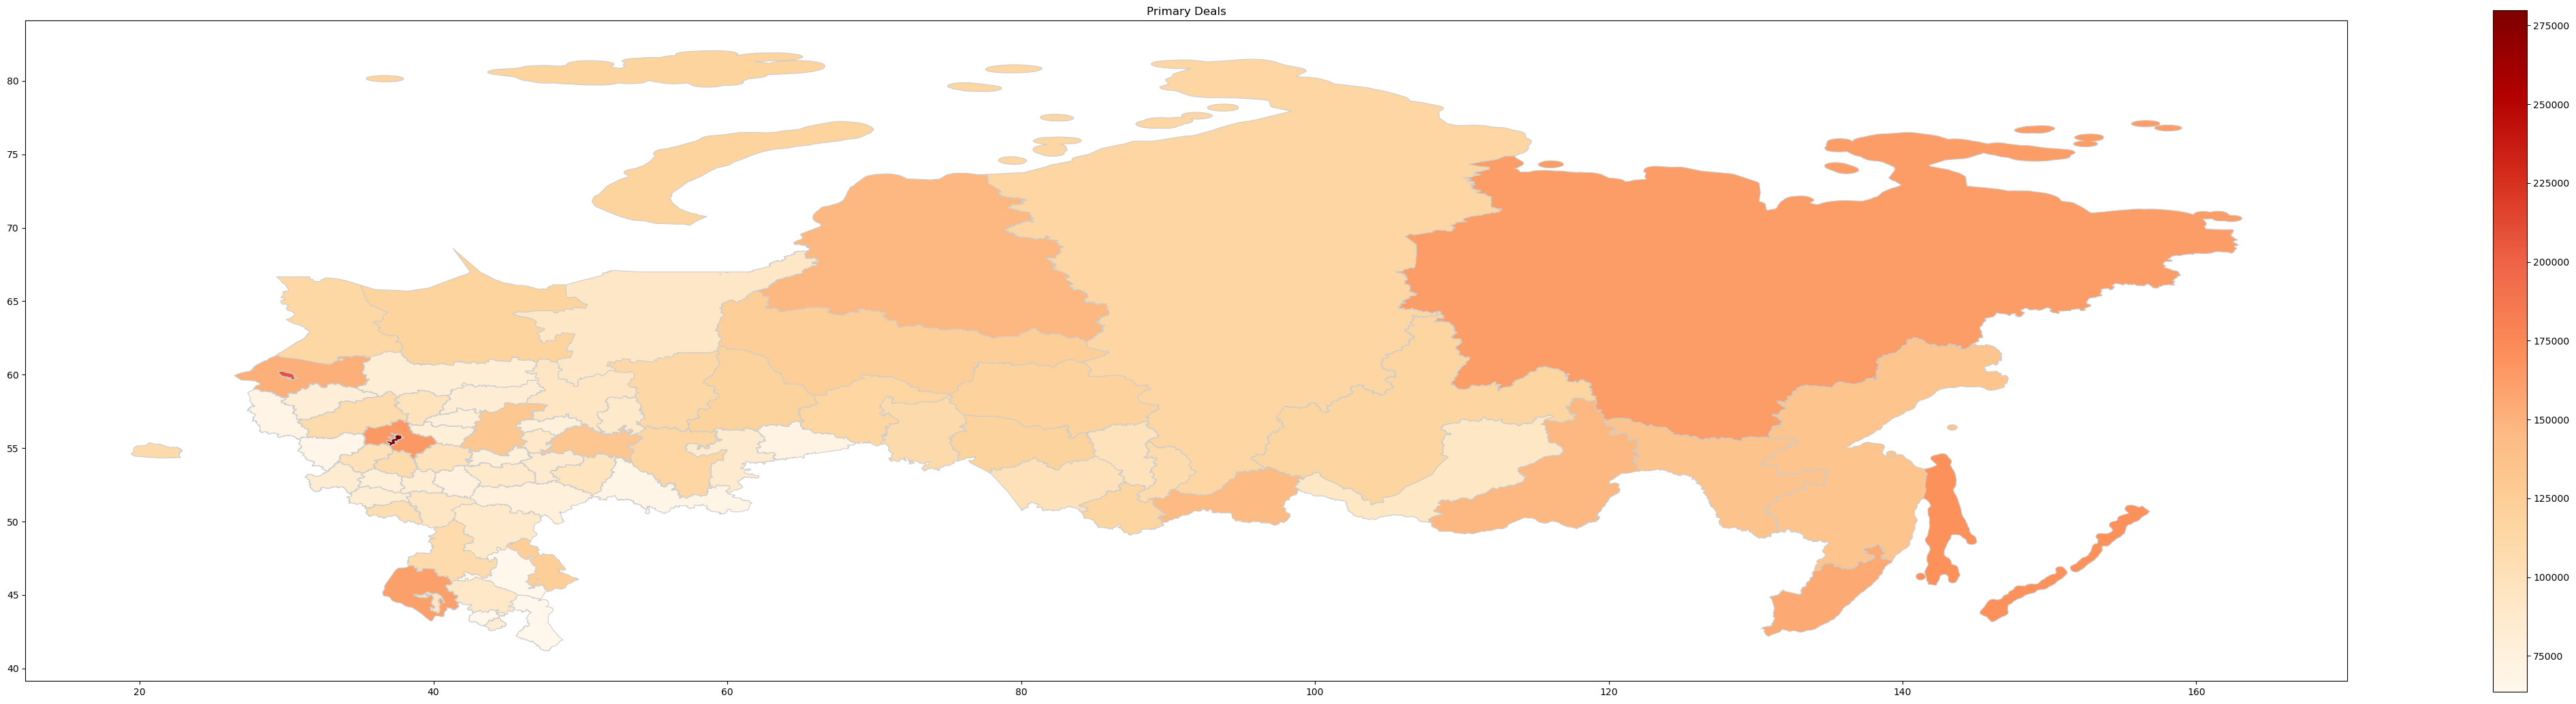

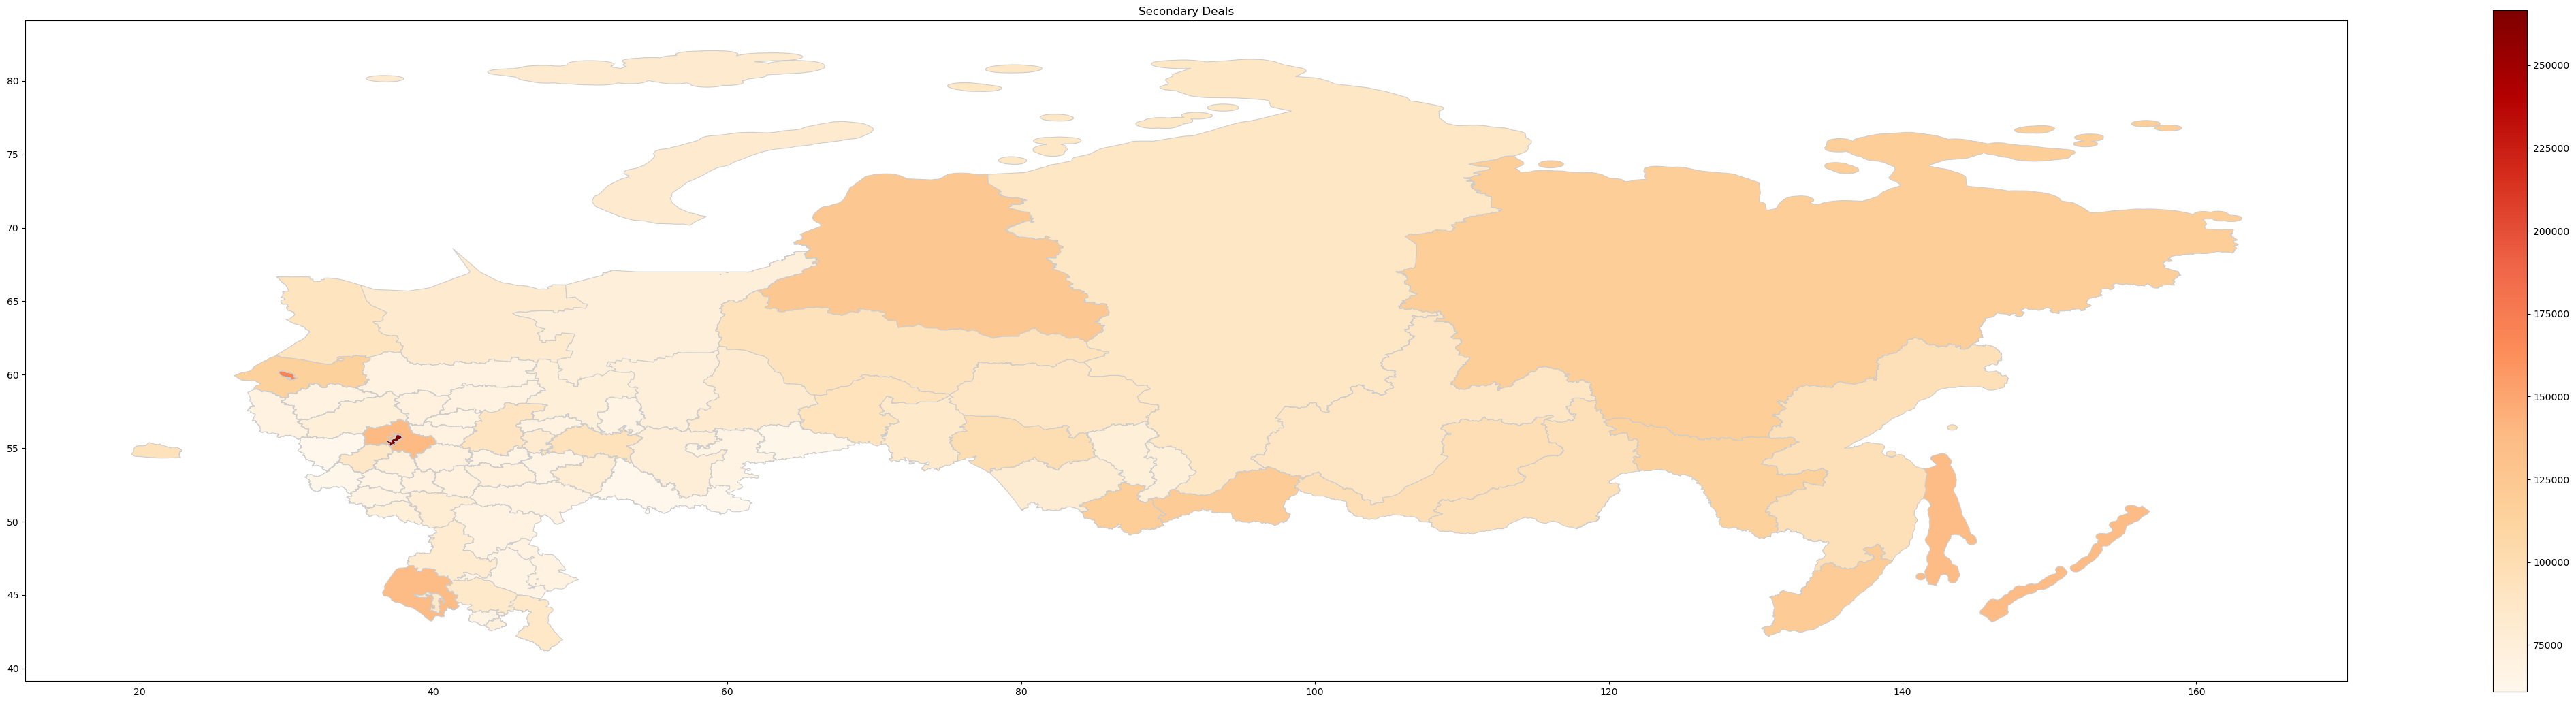

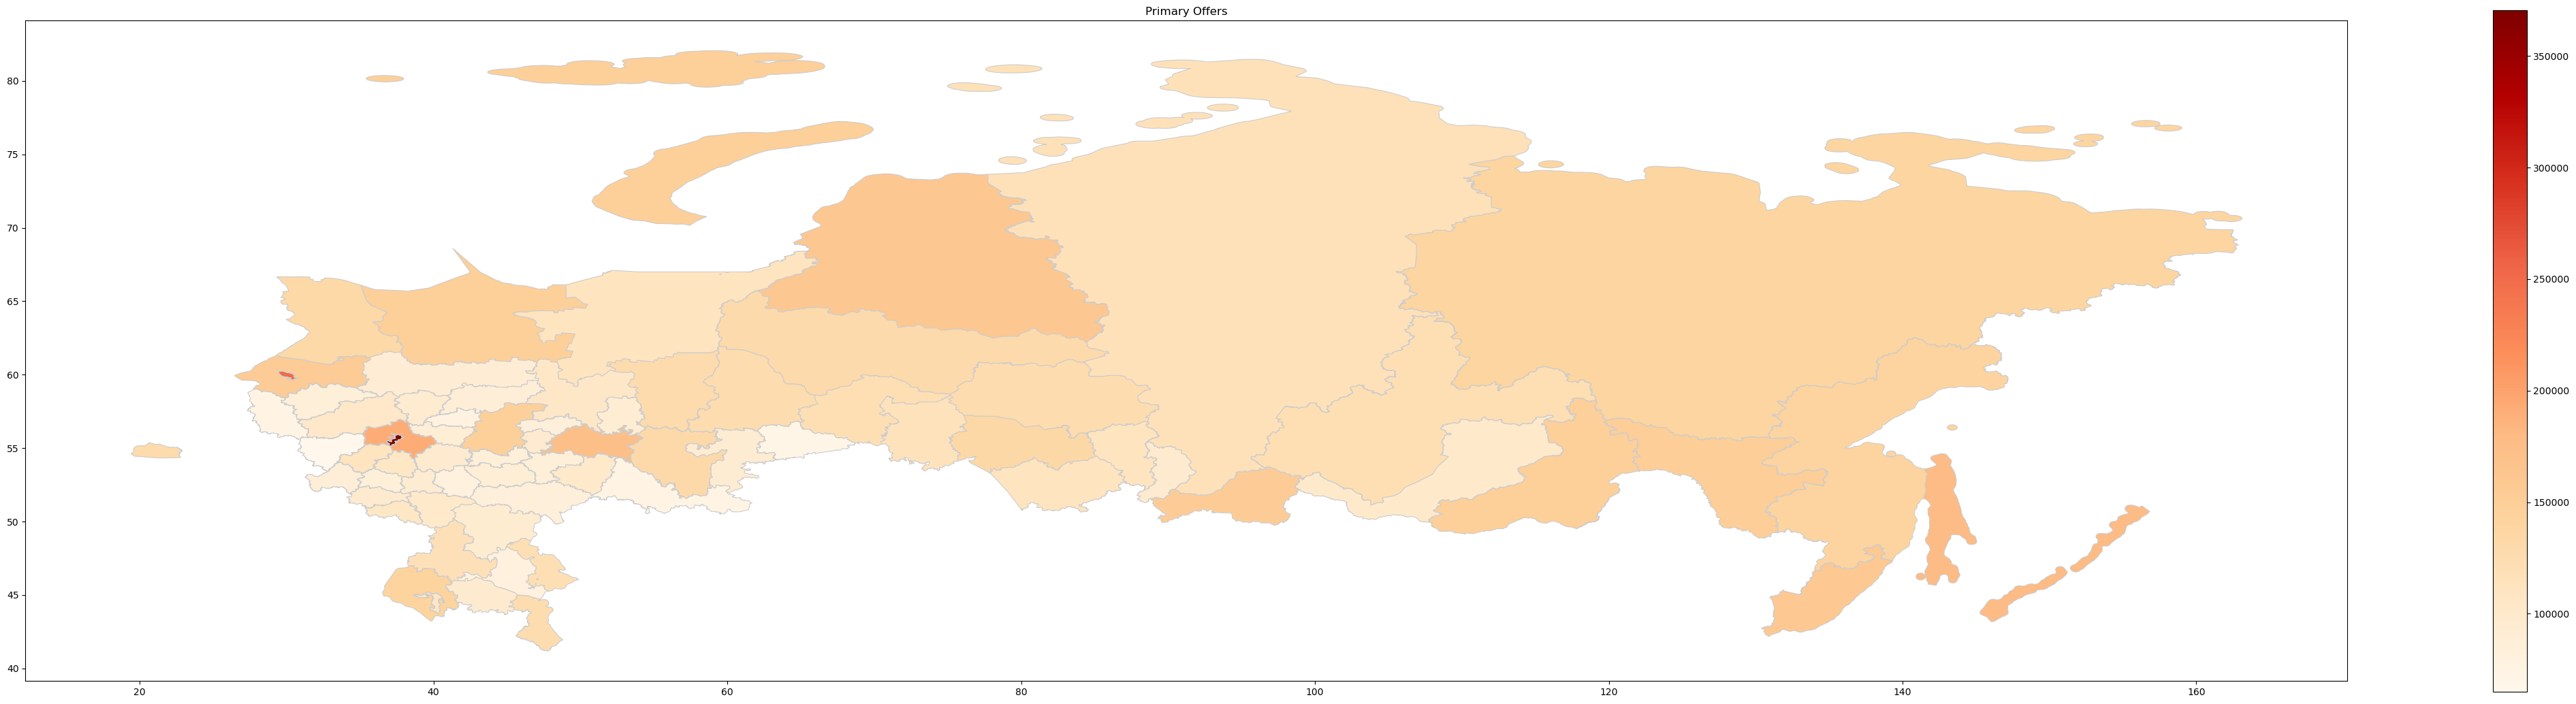

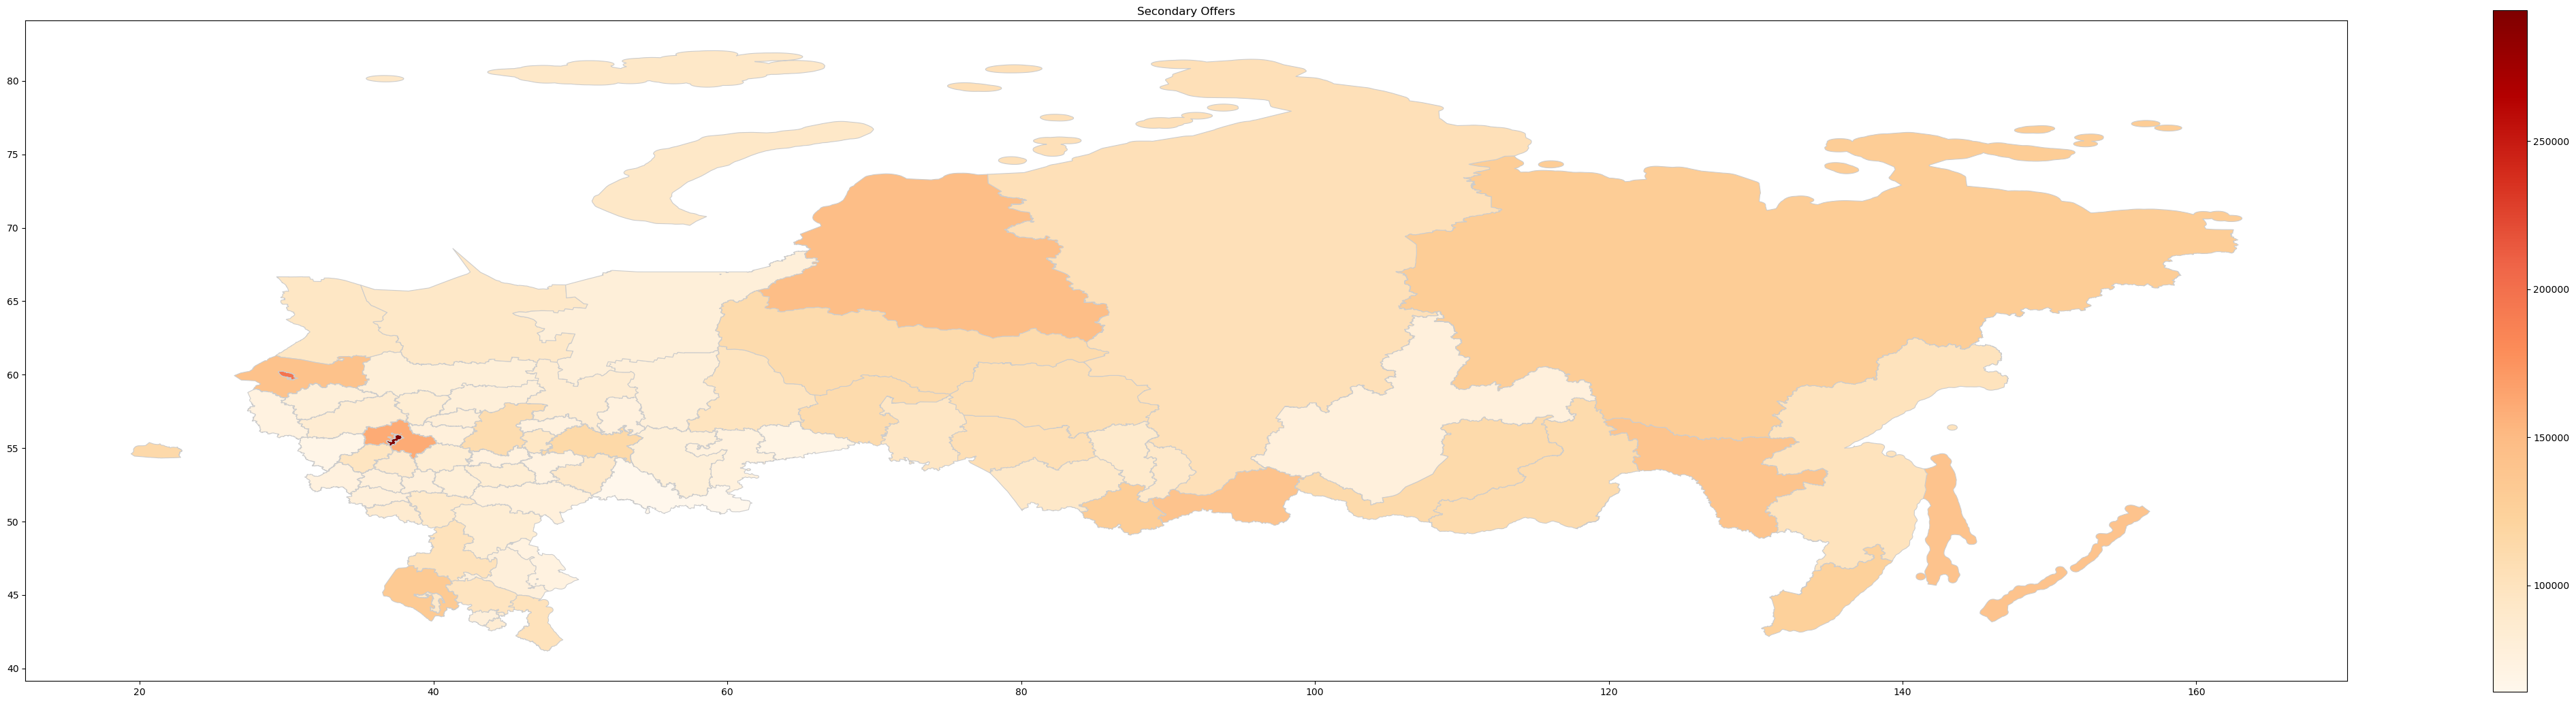

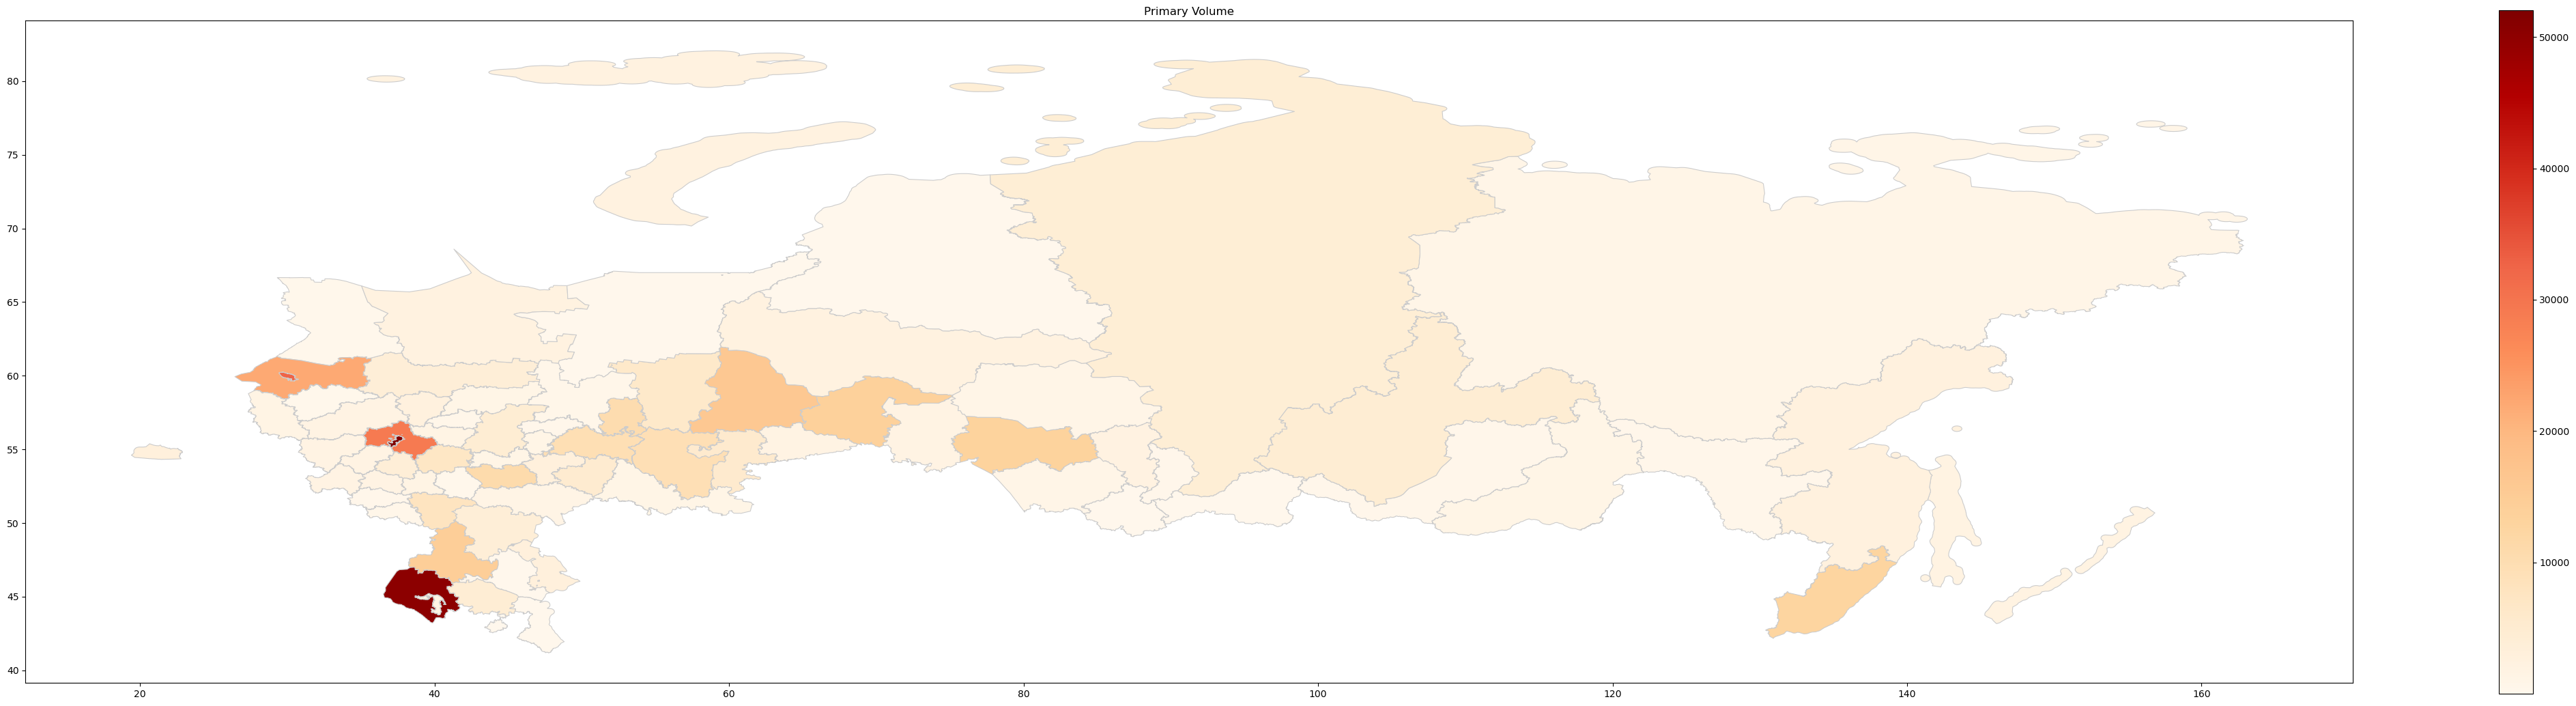

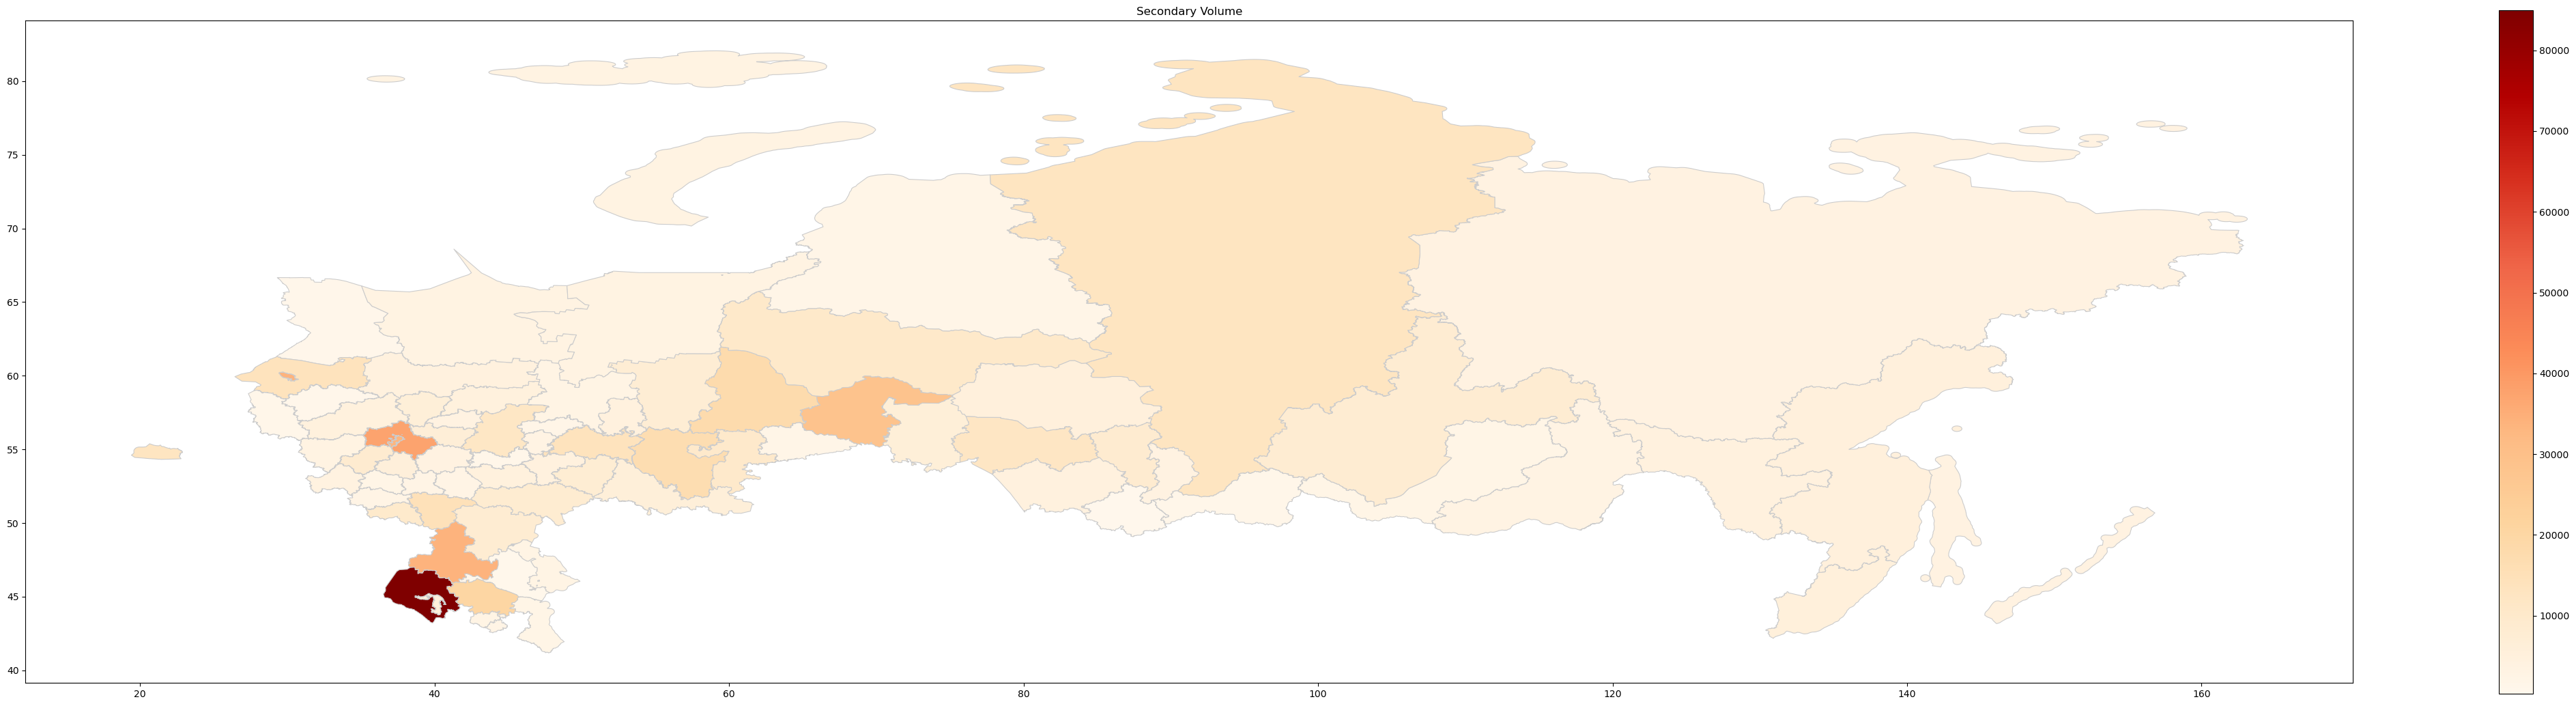

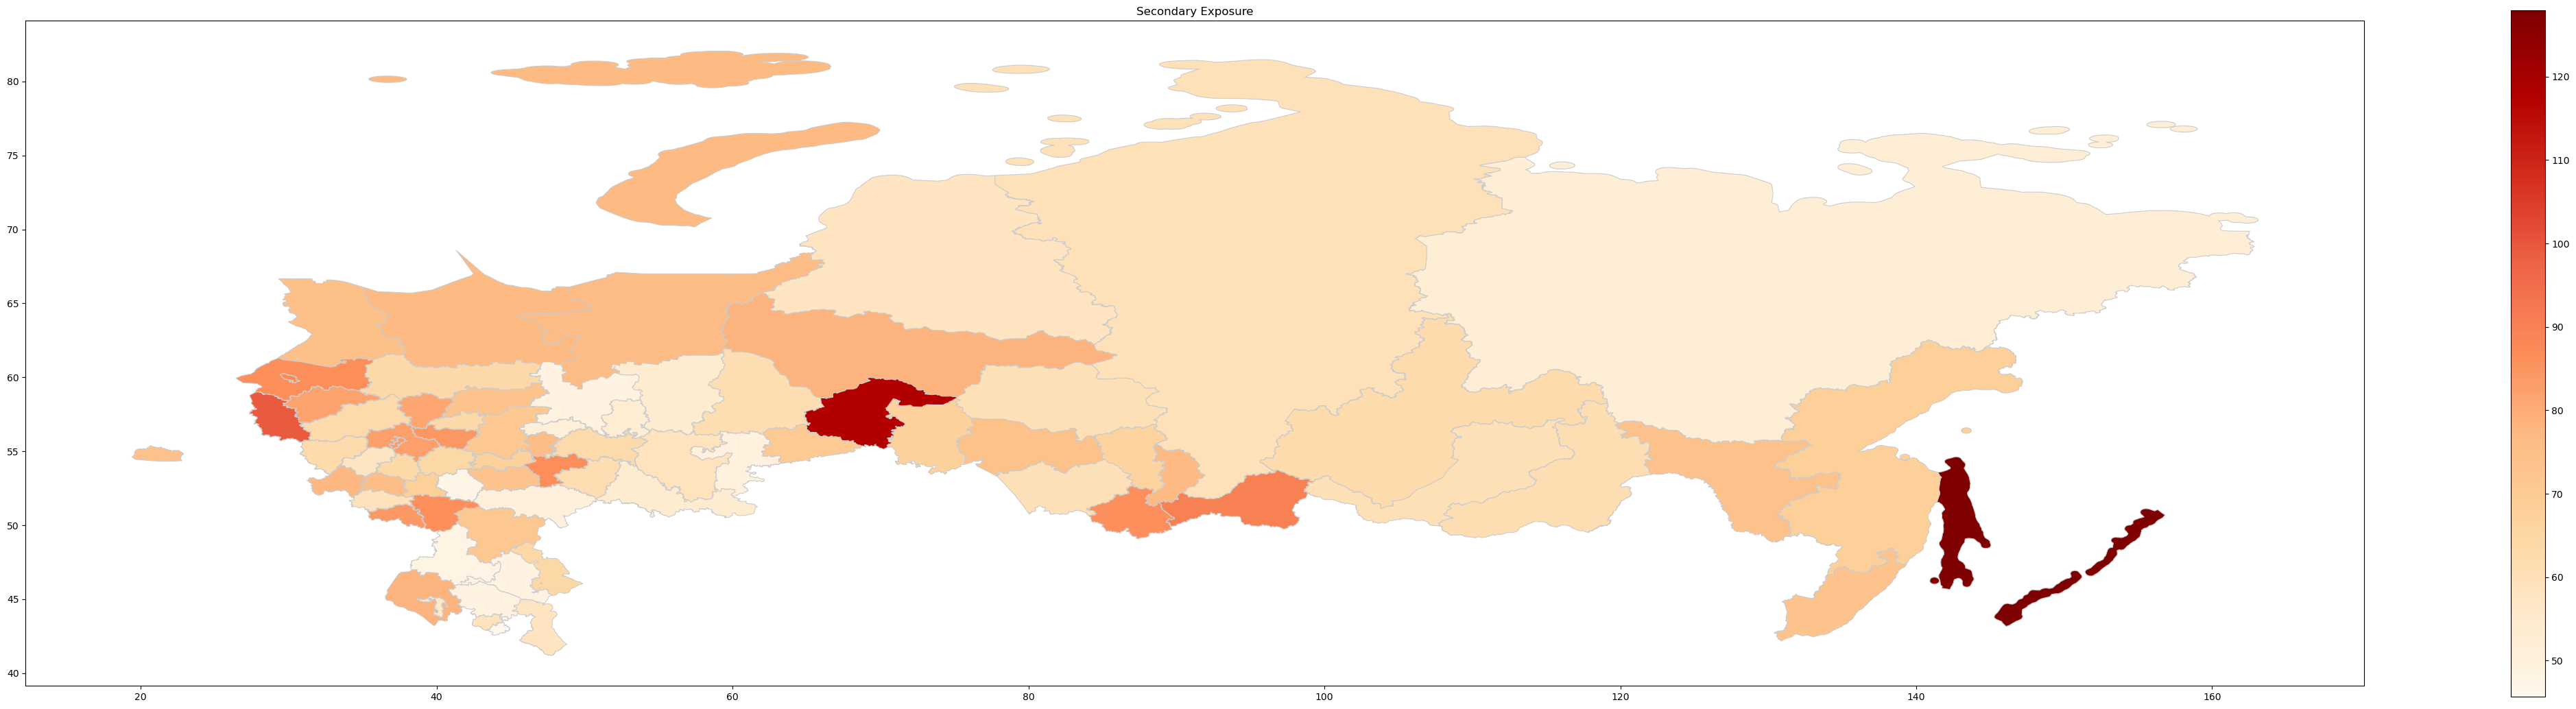

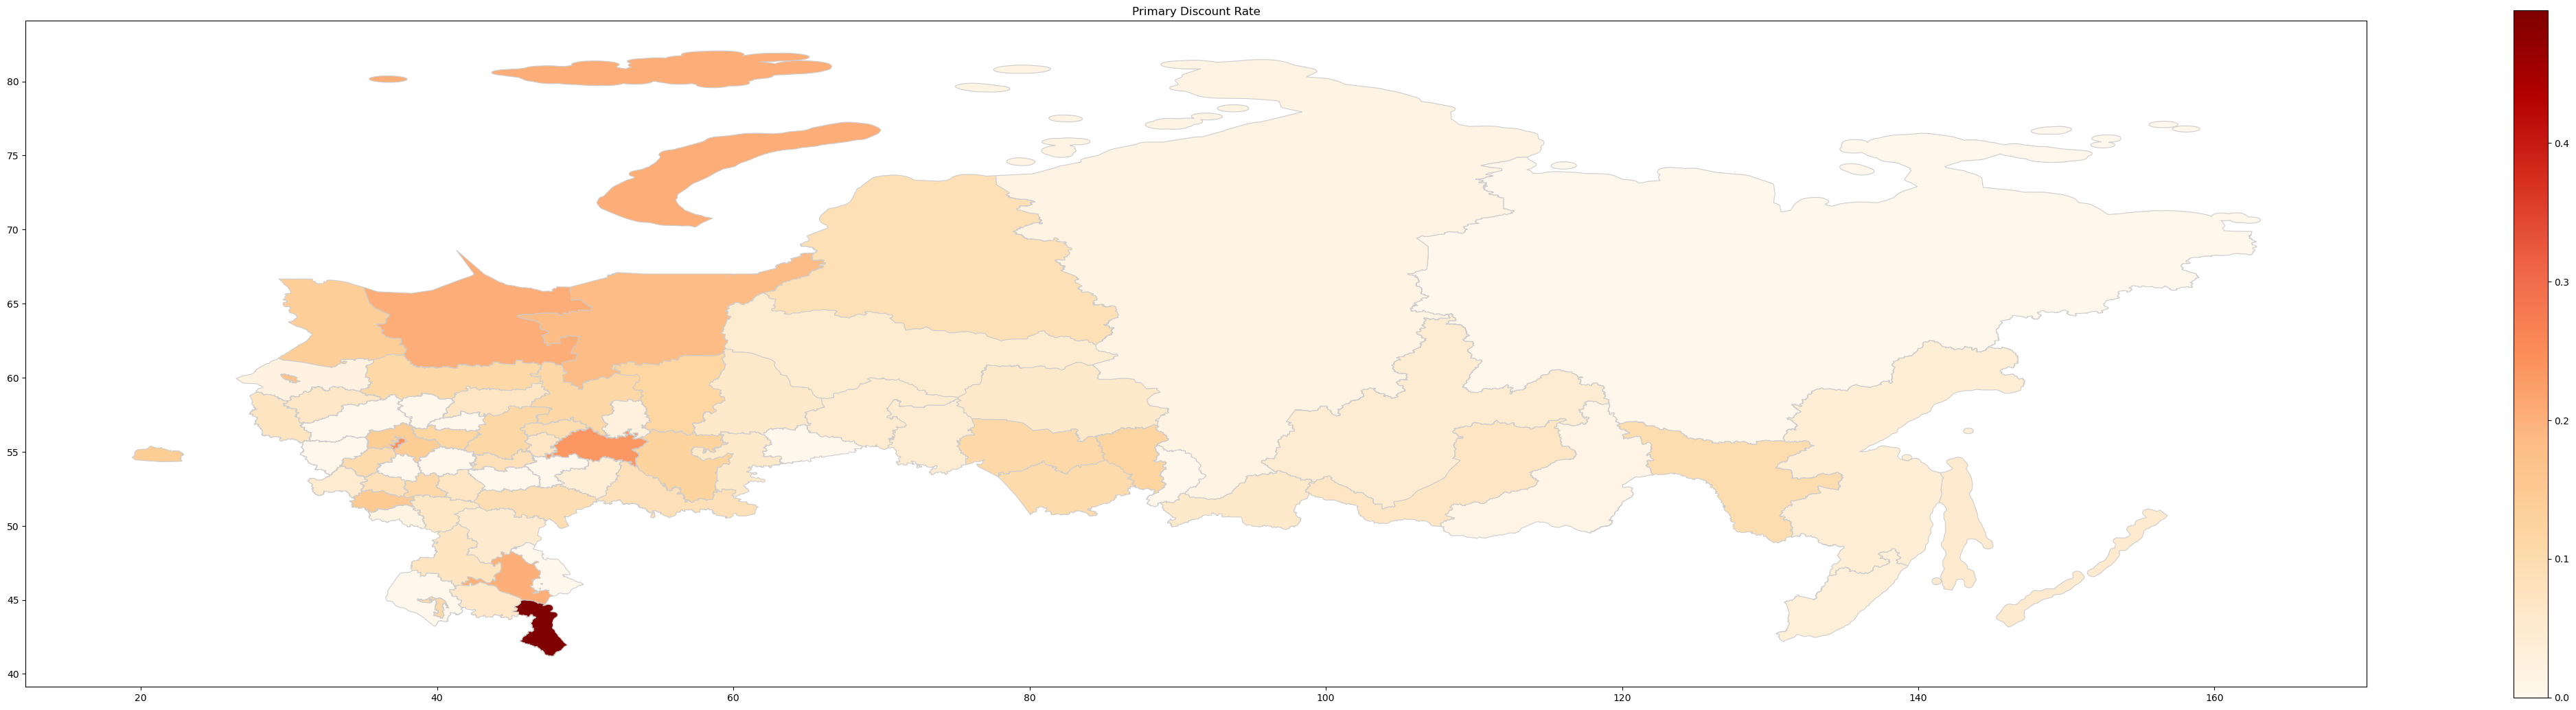

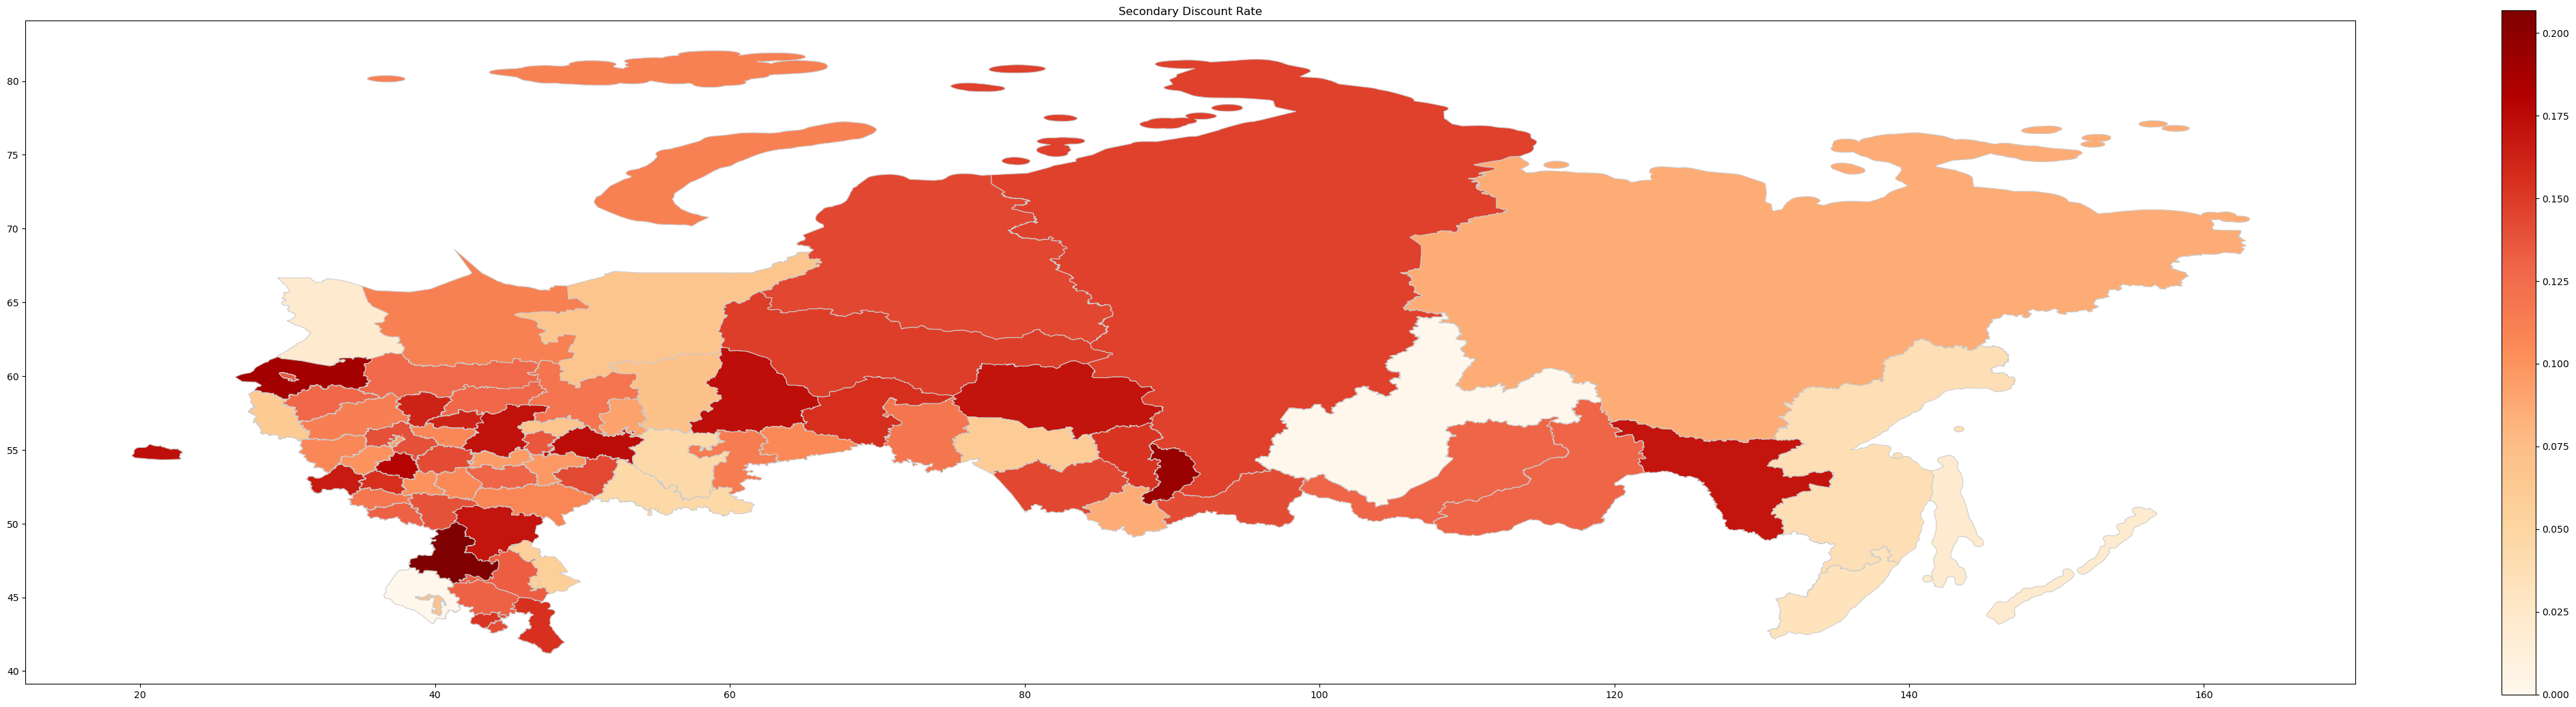

In [62]:
# Plot heatmaps using maplotlib
for data, column_name, display_name, filename in datasets_plt:
    create_and_display_heatmaps(data, column_name, display_name, filename)


In [54]:
# Merge to add the '_merge' column
primary_discounts = primary_discounts.merge(gdf[['name']], left_on='region', right_on='name', how='outer', indicator=True)
secondary_discounts = secondary_discounts.merge(gdf[['name']], left_on='region', right_on='name', how='outer', indicator=True)

# Filter out the 'right_only' rows
primary_discounts = primary_discounts[primary_discounts['_merge'] != 'right_only'].drop(columns=['_merge', 'name'])
secondary_discounts = secondary_discounts[secondary_discounts['_merge'] != 'right_only'].drop(columns=['_merge', 'name'])


In [59]:
# Add to datasets
datasets_folium = [
    (primary_deals, 'value', 'Primary Deals', 'primary_deals.html'),
    (secondary_deals, 'value', 'Secondary Deals', 'secondary_deals.html'),
    (primary_offers, 'value', 'Primary Offers', 'primary_offers.html'),
    (secondary_offers, 'value', 'Secondary Offers', 'secondary_offers.html'),
    (primary_volume, 'value', 'Primary Volume', 'primary_volume.html'),
    (secondary_volume, 'value', 'Secondary Volume', 'secondary_volume.html'),
    (secondary_exposure, 'value', 'Secondary Exposure', 'secondary_exposure.html'),
    (primary_discounts, 'discount_rate', 'Primary Discount Rate', 'primary_discount.html'),
    (secondary_discounts, 'discount_rate', 'Secondary Discount Rate', 'secondary_discount.html')]

In [60]:
def create_and_save_choropleth(data, column_name, display_name, filename):
    m = folium.Map([60, 100], zoom_start=3)
    
    # Adding a title to the map
    title_html = f'''
        <h3 align="center" style="font-size:20px">
        <b>{display_name}</b>
        </h3>
        '''
    m.get_root().html.add_child(folium.Element(title_html))
    
    merged_data = gdf.merge(data, left_on="name", right_on="region")
    choropleth = folium.Choropleth(
        geo_data=merged_data, # Using the merged dataset
        data=merged_data,     # Using the merged dataset
        columns=['name', column_name],
        key_on='feature.properties.name',
        fill_color='YlOrRd',
        legend_name=display_name
    ).add_to(m)
    
    # Add pop-ups to the map
    choropleth.geojson.add_child(
        folium.features.GeoJsonTooltip(
            fields=['name', column_name],
            aliases=['Region: ', display_name + ': '],
            localize=True
        )
    )
    
    m.save(filename)     

In [61]:
# Apply function to 'datasets'
for data, column_name, display_name, filename in datasets_folium:
    create_and_save_choropleth(data, column_name, display_name, filename)